<a href="https://colab.research.google.com/github/OJB-Quantum/Notebooks/blob/main/Quantum_Harmonic_Oscillator_Using_Qiskit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

E_J = 20e9
w = 5e9
anharm = -300e6

N_phis = 101
phis = np.linspace(-np.pi,np.pi,N_phis)
mid_idx = int((N_phis+1)/2)

# potential energies of the QHO & transmon
U_QHO = 0.5*E_J*phis**2
U_QHO = U_QHO/w
U_transmon = (E_J-E_J*np.cos(phis))
U_transmon = U_transmon/w

In [ ]:
# import QuTiP, construct Hamiltonians, and solve for energies
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install qutip
from qutip import destroy
N = 35
N_energies = 5
c = destroy(N)
H_QHO = w*c.dag()*c
E_QHO = H_QHO.eigenenergies()[0:N_energies]
H_transmon = w*c.dag()*c + (anharm/2)*(c.dag()*c)*(c.dag()*c - 1)
E_transmon = H_transmon.eigenenergies()[0:2*N_energies]

  Using cached qutip-4.7.0-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (16.1 MB)


In [ ]:
print(E_QHO[:4])
print(E_transmon[:8])

[0.0e+00 5.0e+09 1.0e+10 1.5e+10]
[0.00e+00 1.70e+09 5.00e+09 6.60e+09 9.70e+09 1.12e+10 1.41e+10 1.55e+10]


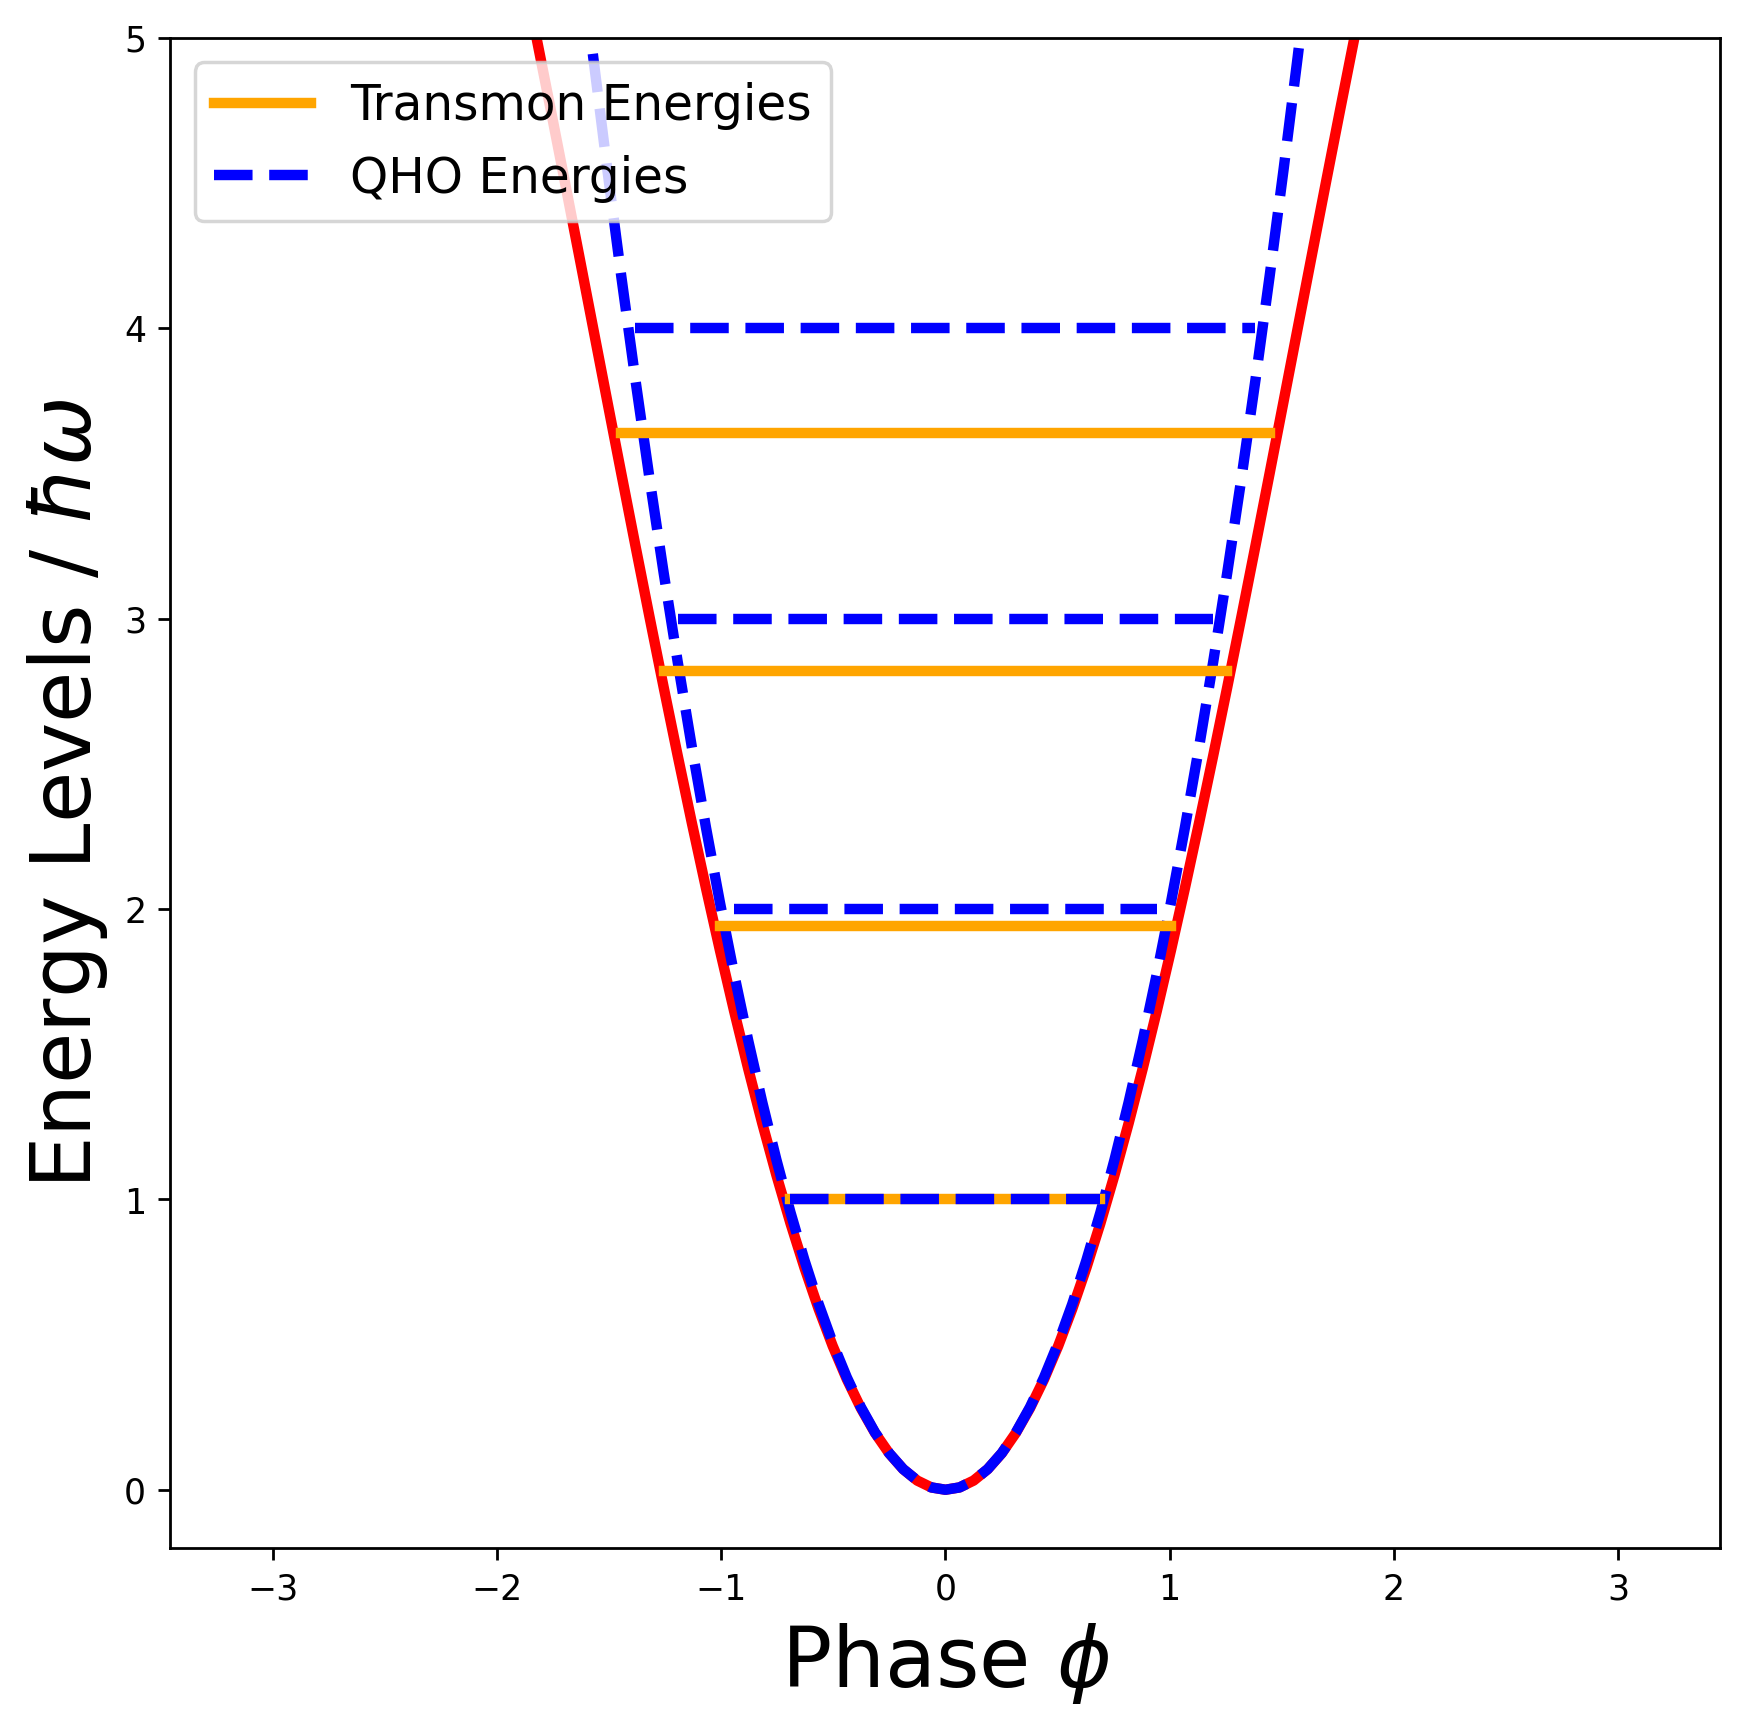

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(8,8),dpi=250)

axes.plot(phis, U_transmon, '-', color='red', linewidth=3.0)
axes.plot(phis, U_QHO, '--', color='blue', linewidth=3.0)

for eidx in range(1,N_energies):
    delta_E_QHO = (E_QHO[eidx]-E_QHO[0])/w
    delta_E_transmon = (E_transmon[2*eidx]-E_transmon[0])/w
    QHO_lim_idx = min(np.where(U_QHO[int((N_phis+1)/2):N_phis] > delta_E_QHO)[0])
    trans_lim_idx = min(np.where(U_transmon[int((N_phis+1)/2):N_phis] > delta_E_transmon)[0])
    trans_label, = axes.plot([phis[mid_idx-trans_lim_idx-1], phis[mid_idx+trans_lim_idx-1]], \
                             [delta_E_transmon, delta_E_transmon], '-', color='orange', linewidth=3.0)
    qho_label, = axes.plot([phis[mid_idx-QHO_lim_idx-1], phis[mid_idx+QHO_lim_idx-1]], \
                           [delta_E_QHO, delta_E_QHO], '--', color='blue', linewidth=3.0)
    
axes.set_xlabel('Phase $\phi$', fontsize=24)
axes.set_ylabel('Energy Levels / $\hbar\omega$', fontsize=24)
axes.set_ylim(-0.2,5)

qho_label.set_label('QHO Energies')
trans_label.set_label('Transmon Energies')
axes.legend(loc=2, fontsize=14)